In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, array
from qutip import *
from scipy import optimize

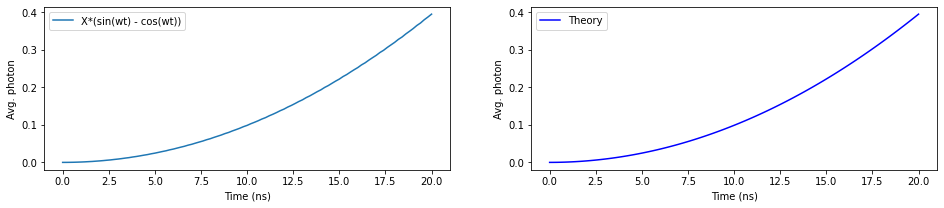

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.82095136+3.22646153e-04j]
 [ 0.09576973-5.06715929e-01j]
 [-0.21343318-8.32568088e-02j]
 [-0.04363738+7.02963974e-02j]
 [ 0.02064887+1.86624933e-02j]]

In [2]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*kappa_self

amp_I = 0.01 *2*pi # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 20 # ns
theta = 0.0
H0 =  (omega_cav + kappa_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 0) # initial state
tlist = np.linspace(0, t_end, 101)

output = mesolve(H, psi0, tlist, c_ops, [], args = args)
# output2 = mesolve([H0, [H1, 'sin(w*t) - cos(w*t)']], psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement
    
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output.states))
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'(X+P)*sin(wt)','X*(sin(wt) - cos(wt))'})
axes[1].legend({'Theory'})

plt.show()

output.states[-1] # Difference between the final states, phases are correct

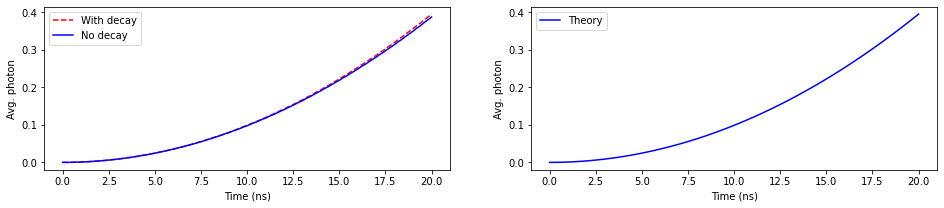

array([0.67922995+1.37142697e-16j, 0.26272832-1.53656540e-16j,
       0.05082358+1.19026315e-17j, 0.00650202+4.03490464e-18j,
       0.00071614+5.76307182e-19j])

In [4]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_cav = 1/(0.5*1e3)  # Cavity decay rate
chi_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*chi_self

amp_I = 0.01 *2*pi # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 20 # ns
theta = 0.0
H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(kappa_cav) * a)
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 0) # initial state
tlist = np.linspace(0, t_end, 101)

output = mesolve(H, psi0, tlist, [], [], args = args)
output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement
    
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'No decay','With decay'})
axes[1].legend({'Theory'})

plt.show()

np.diag(output2.states[-1]) # Final density matrix

# n=0

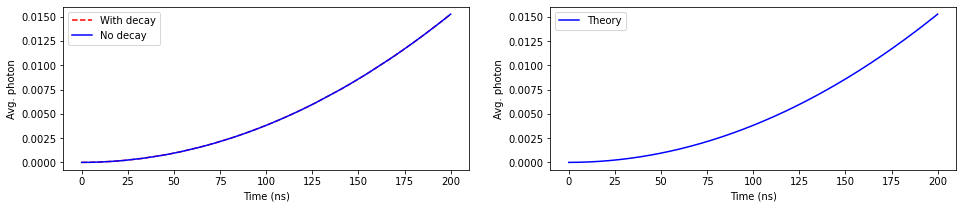

[9.84856053e-01-1.92716352e-17j 1.50306684e-02+1.91257117e-17j
 1.12733081e-04+1.46000070e-19j 5.43967871e-07-7.31424826e-23j
 1.93337801e-09-3.45852522e-24j]


In [22]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_cav = 1/(500*1e3)  # Cavity decay rate
chi_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*chi_self

amp_I = 0.001236 # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 200 # ns
theta = 0.0
H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(kappa_cav) * a)
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 0) # initial state
tlist = np.linspace(0, t_end, t_end*10+1)

output = mesolve(H, psi0, tlist, [], [], args = args)
output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement
    
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output2.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'No decay','With decay'})
axes[1].legend({'Theory'})

plt.show()

print(np.diag(output2.states[-1])) # Final density matrix

ValueError: x and y must have same first dimension, but have shapes (100001,) and (2001,)

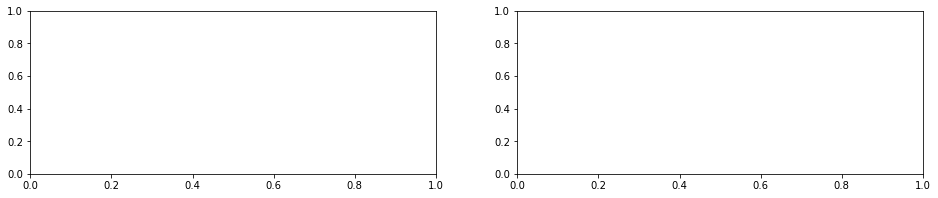

In [20]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_cav = 1/(500*1e3)  # Cavity decay rate
chi_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*chi_self

amp_I = 0.001236 # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 200 # ns
theta = 0.0
H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(kappa_cav) * a)
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 0) # initial state
tlist = np.linspace(0, t_end, t_end*10+1)

output = mesolve(H, psi0, tlist, [], [], args = args)
output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)


psi0 = output2.states[-1] # initial state
tlist = np.linspace(0, 50*t_end, 50*t_end*5+1)

H1 = 0 * (a + a.dag())        # +X: phase = 0
H2 = 0 * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement
    
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output2.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'No decay','With decay'})
axes[1].legend({'Theory'})

plt.show()

print(np.diag(output2.states[-1])) # Final density matrix

C:\Users\slab\.conda\envs\qoc_nl\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


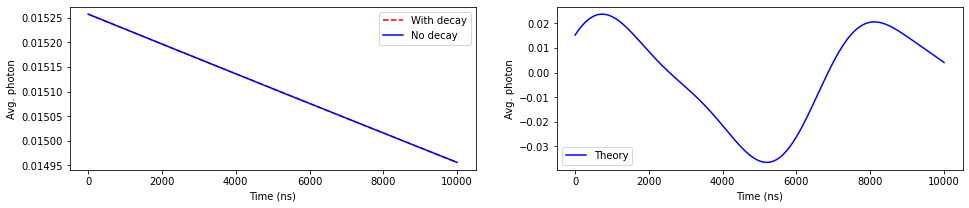

[9.85153724e-01-1.88928635e-17j 1.47374180e-02+1.87526647e-17j
 1.08343804e-04+1.40271143e-19j 5.12433864e-07-6.91409769e-23j
 1.78473284e-09-3.19262116e-24j]


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output2.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'No decay','With decay'})
axes[1].legend({'Theory'})

plt.show()

print(np.diag(output2.states[-1])) # Final density matrix

# n=1

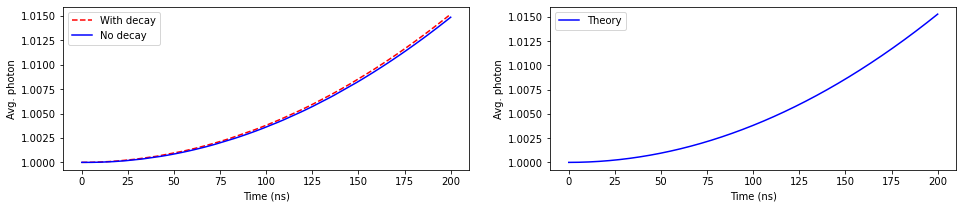

array([1.54204732e-02+2.76737298e-17j, 9.54645898e-01-4.55194316e-17j,
       2.95956440e-02+1.86258560e-17j, 3.35786712e-04-7.74836705e-19j,
       2.19823863e-06-5.28618300e-21j])

In [17]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_cav = 1/(500*1e3)  # Cavity decay rate
chi_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*chi_self

amp_I = 0.001236 # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 200 # ns
theta = 0.0
H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(kappa_cav) * a)
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 1) # initial state
tlist = np.linspace(0, t_end, t_end*10+1)

output = mesolve(H, psi0, tlist, [], [], args = args)
output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement
    
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'No decay','With decay'})
axes[1].legend({'Theory'})

plt.show()

np.diag(output2.states[-1]) # Final density matrix

In [23]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_cav = 1/(500*1e3)  # Cavity decay rate
chi_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*chi_self

amp_I = 0.001236 # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 200 # ns
theta = 0.0
H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(kappa_cav) * a)
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 1) # initial state
tlist = np.linspace(0, t_end, t_end*10+1)

output = mesolve(H, psi0, tlist, [], [], args = args)
output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi0 = output2.states[-1] # initial state
tlist = np.linspace(0, 50*t_end, 50*t_end*5+1)

H1 = 0 * (a + a.dag())        # +X: phase = 0
H2 = 0 * (-1j)*(a - a.dag())  # +P: phase = pi/2
H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement

C:\Users\slab\.conda\envs\qoc_nl\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


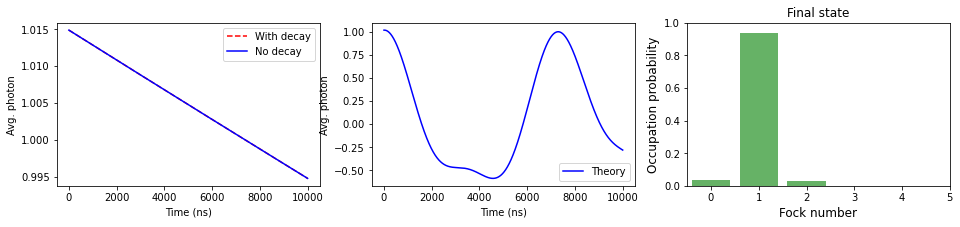

[3.43353354e-02+2.67796817e-17j 9.36891887e-01-4.38959528e-17j
 2.84543521e-02+1.78512902e-17j 3.16395989e-04-7.30108039e-19j
 2.02923001e-06-4.87976194e-21j]


In [29]:
fig, axs = plt.subplots(1, 3, figsize=(16,3))
axs[0].plot(tlist, expect(num(dim), output2.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axs[1].plot(tlist, expect(num(dim), psi), 'b')
axs[0].set_xlabel('Time (ns)')
axs[1].set_xlabel('Time (ns)')
axs[0].set_ylabel('Avg. photon')
axs[1].set_ylabel('Avg. photon')
axs[0].legend({'No decay','With decay'})
axs[1].legend({'Theory'})

plot_fock_distribution(output2.states[-1], fig=fig, ax=axs[2], title="Final state");
# axs[2].set_yscale('log')
plt.show()

print(np.diag(output2.states[-1])) 

# n=2

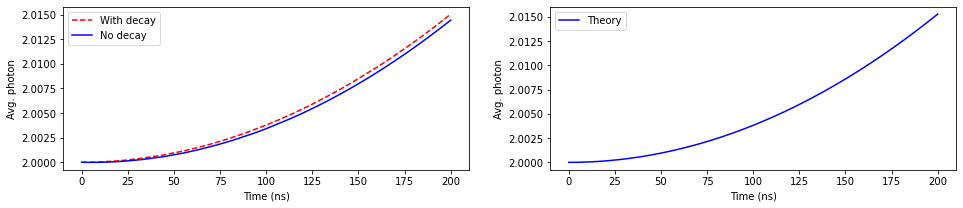

array([1.25846268e-04+6.05558286e-19j, 3.03522284e-02+1.30633369e-16j,
       9.25156664e-01-1.97447613e-16j, 4.36899902e-02+6.51672817e-17j,
       6.75271134e-04+1.02162446e-18j])

In [19]:
dim = 5
a = destroy(dim)

omega_cav = 2*pi * 6.011 # GHz
kappa_cav = 1/(500*1e3)  # Cavity decay rate
chi_self = 2*pi * 15e-6
drive_cav = omega_cav + 0*chi_self

amp_I = 0.001236 # Drive amplitude = 0.01 GHz
amp_Q = 0.00 *2*pi
t_end = 200 # ns
theta = 0.0
H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

H1 = amp_I * (a + a.dag())        # +X: phase = 0
H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2


H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(kappa_cav) * a)
args = {'w': drive_cav, 'theta': theta}

psi0 = basis(dim, 2) # initial state
tlist = np.linspace(0, t_end, t_end*10+1)

output = mesolve(H, psi0, tlist, [], [], args = args)
output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

psi = []
for val in tlist:
    psi.append(displace(dim,amp_I*val/2)*psi0) # Compute action of displacement
    
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0].plot(tlist, expect(num(dim), output.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
axes[1].plot(tlist, expect(num(dim), psi), 'b')
axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
axes[0].set_ylabel('Avg. photon')
axes[1].set_ylabel('Avg. photon')
axes[0].legend({'No decay','With decay'})
axes[1].legend({'Theory'})

plt.show()

np.diag(output2.states[-1]) # Final density matrix

In [15]:
np.sum(np.diag(output2.states[-1]))

(1.0000000000000064+9.989454999761064e-20j)

[9.85153724e-01-1.88928635e-17j 1.47374180e-02+1.87526647e-17j
 1.08343804e-04+1.40271143e-19j 5.12433864e-07-6.91409769e-23j
 1.78473284e-09-3.19262116e-24j]
[3.43353354e-02+2.67796817e-17j 9.36891887e-01-4.38959528e-17j
 2.84543521e-02+1.78512902e-17j 3.16395989e-04-7.30108039e-19j
 2.02923001e-06-4.87976194e-21j]
[1.08994699e-03+3.11536067e-18j 6.57147731e-02+1.20457209e-16j
 8.91375872e-01-1.85983868e-16j 4.11960536e-02+6.14484404e-17j
 6.23353822e-04+9.43078239e-19j]
[3.26175519e-05-5.57183067e-20j 3.13902228e-03-4.24973083e-18j
 9.43009267e-02-7.93308685e-17j 8.48270366e-01+4.70404513e-17j
 5.42570677e-02+3.65244754e-17j]


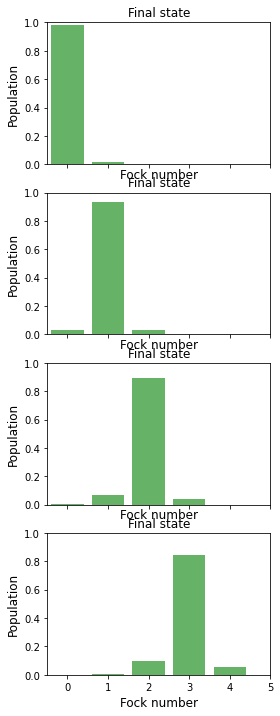

In [33]:
n_max = 4
fig, axs = plt.subplots(nrows=n_max, ncols=1, sharex=True, figsize=(4,12))

for i in range(n_max):
    dim = 5
    a = destroy(dim)

    omega_cav = 2*pi * 6.011 # GHz
    kappa_cav = 1/(500*1e3)  # Cavity decay rate
    chi_self = 2*pi * 15e-6
    drive_cav = omega_cav + 0*chi_self

    amp_I = 0.001236 # Drive amplitude = 0.01 GHz
    amp_Q = 0.00 *2*pi
    t_end = 200 # ns
    theta = 0.0
    H0 =  (omega_cav + chi_self * a.dag()*a ) * a.dag()*a     # Cavity with self-Kerr

    H1 = amp_I * (a + a.dag())        # +X: phase = 0
    H2 = amp_Q * (-1j)*(a - a.dag())  # +P: phase = pi/2
    H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

    c_ops = []  # Build collapse operators
    c_ops.append(np.sqrt(kappa_cav) * a)
    args = {'w': drive_cav, 'theta': theta}

    psi0 = basis(dim, i) # initial state
    tlist = np.linspace(0, t_end, t_end*10+1)

    output = mesolve(H, psi0, tlist, [], [], args = args)
    output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

    psi0 = output2.states[-1] # initial state
    tlist = np.linspace(0, 50*t_end, 50*t_end*5+1)

    H1 = 0 * (a + a.dag())        # +X: phase = 0
    H2 = 0 * (-1j)*(a - a.dag())  # +P: phase = pi/2
    H = [H0, [H1, 'sin(w*t)'], [H2, 'sin(w*t+theta)']]

    output2 = mesolve(H, psi0, tlist, c_ops, [], args = args)

    psi = []
    for val in tlist:
        psi.append(displace(dim, amp_I*val/2)*psi0) # Compute action of displacement

#     axs[i].plot(tlist, expect(num(dim), output2.states), 'r--', tlist, expect(num(dim), output2.states), 'b')
#     axs[i].plot(tlist, expect(num(dim), psi), 'b')
    plot_fock_distribution(output2.states[-1], ax=axs[i])
    axs[i].set_ylabel('Population')

    print(np.diag(output2.states[-1]))

axs[i].set_xlabel('Fock number')
plt.show()


In [35]:
n0 = [9.85153724e-01-1.88928635e-17j, 1.47374180e-02+1.87526647e-17j,
 1.08343804e-04+1.40271143e-19j, 5.12433864e-07-6.91409769e-23j,
 1.78473284e-09-3.19262116e-24j]
n1 = [3.43353354e-02+2.67796817e-17j, 9.36891887e-01-4.38959528e-17j,
 2.84543521e-02+1.78512902e-17j, 3.16395989e-04-7.30108039e-19j,
 2.02923001e-06-4.87976194e-21j]
n2 = [1.08994699e-03+3.11536067e-18j, 6.57147731e-02+1.20457209e-16j,
 8.91375872e-01-1.85983868e-16j, 4.11960536e-02+6.14484404e-17j,
 6.23353822e-04+9.43078239e-19j]
n3 = [3.26175519e-05-5.57183067e-20j, 3.13902228e-03-4.24973083e-18j,
 9.43009267e-02-7.93308685e-17j, 8.48270366e-01+4.70404513e-17j,
 5.42570677e-02+3.65244754e-17j]

C:\Users\slab\.conda\envs\qoc_nl\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


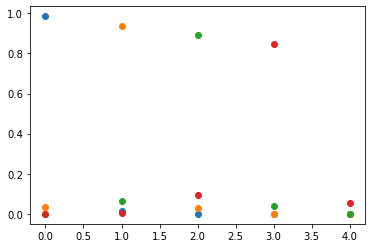

In [37]:
plt.plot(n0, 'o')
plt.plot(n1, 'o')
plt.plot(n2, 'o')
plt.plot(n3, 'o')


In [41]:
print(np.real(n3))

[3.26175519e-05 3.13902228e-03 9.43009267e-02 8.48270366e-01
 5.42570677e-02]
